In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG19, VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import zipfile
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
zip_path = '/content/drive/MyDrive/Cats_and_Dogs.zip'
!cp "{zip_path}" .

!unzip -q Cats_and_Dogs.zip

!rm Cats_and_Dogs.zip

replace Cats_and_Dogs/train/cats/cat.9979.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
path_to_train = 'Cats_and_Dogs/train'
path_to_val =   'Cats_and_Dogs/val'
path_to_test =  'Cats_and_Dogs/test'
# The shape of the RGB image
img_width, img_height, channels = 250, 250, 3 # you can try different sizes

input_shape = (img_width, img_height, channels)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch, train size, val set, test size
batch_size = 128
nb_train_samples = 20000
nb_validation_samples = 2500
nb_test_samples = 2500

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    path_to_train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    path_to_val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    path_to_test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode="rgb",
    shuffle=True,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


#Create model

In [ ]:
model = Sequential()
#convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(16, (3,3), input_shape=input_shape))
model.add(Activation('relu'))
#MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D(pool_size=(2,2)))
#convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
#MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D(pool_size=(2,2)))
#convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
#MaxPooling layer with filter size 2x2.
model.add(MaxPooling2D(pool_size=(2,2)))
#Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
model.add(Flatten())
#fully connected layer with 64 neurons. Activation function - 'relu'
model.add(Dense(64, activation='relu'))
#Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
model.add(Dropout (0.5)) 
#fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        1

In [ ]:
model_10 = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples // batch_size,
                epochs=10, 
                validation_data=val_generator,
                validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
156/156 [==============================] - 79s 487ms/step - loss: 0.6793 - accuracy: 0.5808 - val_loss: 0.5472 - val_accuracy: 0.7299
Epoch 2/10
156/156 [==============================] - 80s 512ms/step - loss: 0.5252 - accuracy: 0.7393 - val_loss: 0.4678 - val_accuracy: 0.7804
Epoch 3/10
156/156 [==============================] - 81s 516ms/step - loss: 0.4477 - accuracy: 0.7927 - val_loss: 0.4268 - val_accuracy: 0.8035
Epoch 4/10
156/156 [==============================] - 74s 475ms/step - loss: 0.3840 - accuracy: 0.8287 - val_loss: 0.4097 - val_accuracy: 0.8088
Epoch 5/10
156/156 [==============================] - 73s 468ms/step - loss: 0.3412 - accuracy: 0.8495 - val_loss: 0.4091 - val_accuracy: 0.8125
Epoch 6/10
156/156 [==============================] - 73s 465ms/step - loss: 0.2984 - accuracy: 0.8743 - val_loss: 0.4095 - val_accuracy: 0.8289
Epoch 7/10
156/156 [==============================] - 72s 464ms/step - loss: 0.2372 - accuracy: 0.9003 - val_loss: 0.4097 - val_ac

In [ ]:
score_model_10 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
model_15 = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples // batch_size,
                epochs=15, 
                validation_data=val_generator,
                validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
156/156 [==============================] - 73s 470ms/step - loss: 0.1107 - accuracy: 0.9582 - val_loss: 0.5722 - val_accuracy: 0.8162
Epoch 2/15
156/156 [==============================] - 73s 465ms/step - loss: 0.0960 - accuracy: 0.9641 - val_loss: 0.6253 - val_accuracy: 0.8207
Epoch 3/15
156/156 [==============================] - 73s 468ms/step - loss: 0.0861 - accuracy: 0.9671 - val_loss: 0.6225 - val_accuracy: 0.8207
Epoch 4/15
156/156 [==============================] - 72s 463ms/step - loss: 0.0760 - accuracy: 0.9708 - val_loss: 0.6473 - val_accuracy: 0.8248
Epoch 5/15
156/156 [==============================] - 72s 465ms/step - loss: 0.0695 - accuracy: 0.9751 - val_loss: 0.6990 - val_accuracy: 0.8240
Epoch 6/15
156/156 [==============================] - 72s 461ms/step - loss: 0.0602 - accuracy: 0.9786 - val_loss: 0.6636 - val_accuracy: 0.8178
Epoch 7/15
156/156 [==============================] - 72s 460ms/step - loss: 0.0562 - accuracy: 0.9788 - val_loss: 0.8508 - val_ac

In [ ]:
score_model_15 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
model_20 = model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples // batch_size,
                epochs=20,
                validation_data=val_generator,
                validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
156/156 [==============================] - 72s 464ms/step - loss: 0.0429 - accuracy: 0.9841 - val_loss: 1.0167 - val_accuracy: 0.8224
Epoch 2/20
156/156 [==============================] - 72s 462ms/step - loss: 0.0377 - accuracy: 0.9853 - val_loss: 0.8745 - val_accuracy: 0.8207
Epoch 3/20
156/156 [==============================] - 71s 457ms/step - loss: 0.0361 - accuracy: 0.9878 - val_loss: 1.0800 - val_accuracy: 0.8220
Epoch 4/20
156/156 [==============================] - 71s 453ms/step - loss: 0.0377 - accuracy: 0.9863 - val_loss: 0.9470 - val_accuracy: 0.8269
Epoch 5/20
156/156 [==============================] - 72s 458ms/step - loss: 0.0327 - accuracy: 0.9876 - val_loss: 1.0306 - val_accuracy: 0.8285
Epoch 6/20
156/156 [==============================] - 72s 462ms/step - loss: 0.0310 - accuracy: 0.9877 - val_loss: 1.0327 - val_accuracy: 0.8285
Epoch 7/20
156/156 [==============================] - 72s 462ms/step - loss: 0.0333 - accuracy: 0.9882 - val_loss: 1.1415 - val_ac

In [ ]:
score_model_20 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


#Results

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def get_plots(model, label):
  plt.plot(model.history['accuracy'])
  plt.plot(model.history['val_accuracy'])
  plt.title('{0} accuracy'.format(label))
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.grid(True)
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.plot(model.history['loss'])
  plt.plot(model.history['val_loss'])
  plt.title('{0} loss'.format(label))
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.grid(True)
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

Accuracy Model_10 on test data: 82.77%


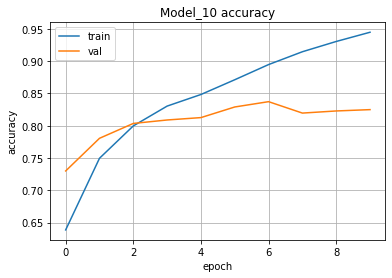

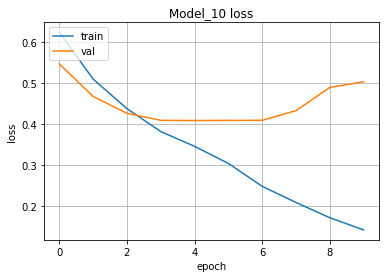

In [ ]:
print("Accuracy Model_10 on test data: %.2f%%" % (score_model_10[1]*100))
get_plots(model_10, "Model_10")

Accuracy Model_15 on test data: 82.40%


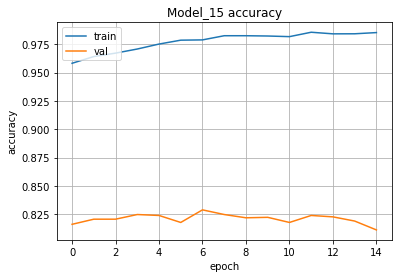

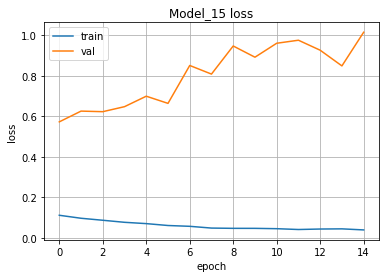

In [ ]:
print("Accuracy Model_15 on test data: %.2f%%" % (score_model_15[1]*100))
get_plots(model_15, "Model_15")

Accuracy model_20 on test data: 82.15%


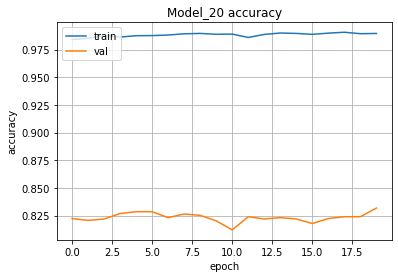

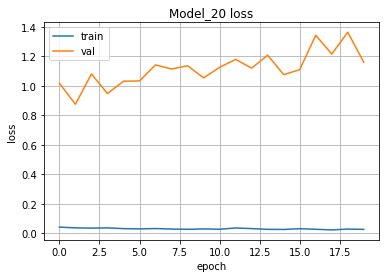

In [ ]:
print("Accuracy model_20 on test data: %.2f%%" % (score_model_20[1]*100))
get_plots(model_20, "Model_20")

#Task2

In [ ]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=input_shape)
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

#vgg16_net.summary()    

In [ ]:
model_vgg16 = Sequential()
model_vgg16.add(vgg16_net)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(1, activation='sigmoid'))
model_vgg16.summary()
model_vgg16.compile(loss='binary_crossentropy',
              optimizer = Adam(lr=1e-5),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history_vgg16 = model_vgg16.fit_generator(
              train_generator,
              steps_per_epoch = nb_train_samples // batch_size,
              epochs = 10,
              validation_data = val_generator,
              validation_steps = nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
156/156 [==============================] - 131s 805ms/step - loss: 0.5868 - accuracy: 0.6771 - val_loss: 0.2889 - val_accuracy: 0.9021
Epoch 2/10
156/156 [==============================] - 123s 785ms/step - loss: 0.2974 - accuracy: 0.8780 - val_loss: 0.2390 - val_accuracy: 0.9058
Epoch 3/10
156/156 [==============================] - 123s 786ms/step - loss: 0.2451 - accuracy: 0.8974 - val_loss: 0.2061 - val_accuracy: 0.9239
Epoch 4/10
156/156 [==============================] - 123s 786ms/step - loss: 0.2101 - accuracy: 0.9191 - val_loss: 0.1945 - val_accuracy: 0.9264
Epoch 5/10
156/156 [==============================] - 123s 787ms/step - loss: 0.1941 - accuracy: 0.9214 - val_loss: 0.1905 - val_accuracy: 0.9227
Epoch 6/10
156/156 [==============================] - 123s 785ms/step - loss: 0.1744 - accuracy: 0.9305 - val_loss: 0.1769 - val_accuracy: 0.9338
Epoch 7/10
156/156 [==============================] - 123s 785ms/step - loss: 0.1581 - accuracy: 0.9433 - val_loss: 0.1745 -

In [ ]:
score_vgg16 = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


###VGG_19

In [ ]:
vgg19_net = VGG19(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=input_shape)
vgg19_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

#vgg19_net.summary()    

In [ ]:
model_vgg19 = Sequential()

#add imported vgg_19
model_vgg19.add(vgg19_net)
# + flattening
model_vgg19.add(Flatten())
# + Dense fullyconnected layer with 256 neurons # + ReLu
model_vgg19.add(Dense(256, activation='relu'))
# + Dropout
model_vgg19.add(Dropout(0.5))
# + Dense layer with 1 neuron # + sigmoid
model_vgg19.add(Dense(1, activation='sigmoid'))

model_vgg19.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 26,447,425
Trainable params: 6,423,041
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
model_vgg19.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [ ]:
history_vgg19 = model_vgg19.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
156/156 [==============================] - 145s 925ms/step - loss: 0.5717 - accuracy: 0.6852 - val_loss: 0.3104 - val_accuracy: 0.8845
Epoch 2/10
156/156 [==============================] - 144s 924ms/step - loss: 0.3174 - accuracy: 0.8667 - val_loss: 0.2541 - val_accuracy: 0.9050
Epoch 3/10
156/156 [==============================] - 144s 924ms/step - loss: 0.2683 - accuracy: 0.8905 - val_loss: 0.2329 - val_accuracy: 0.9141
Epoch 4/10
156/156 [==============================] - 144s 924ms/step - loss: 0.2389 - accuracy: 0.9017 - val_loss: 0.2157 - val_accuracy: 0.9153
Epoch 5/10
156/156 [==============================] - 144s 924ms/step - loss: 0.2164 - accuracy: 0.9133 - val_loss: 0.2080 - val_accuracy: 0.9206
Epoch 6/10
156/156 [==============================] - 144s 923ms/step - loss: 0.2030 - accuracy: 0.9168 - val_loss: 0.1961 - val_accuracy: 0.9326
Epoch 7/10
156/156 [==============================] - 144s 922ms/step - loss: 0.1961 - accuracy: 0.9220 - val_loss: 0.1922 -

In [ ]:
scores_vgg19 = model_vgg19.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


#Results for transfer 

Accuracy VGG_16 on test data: 92.89%


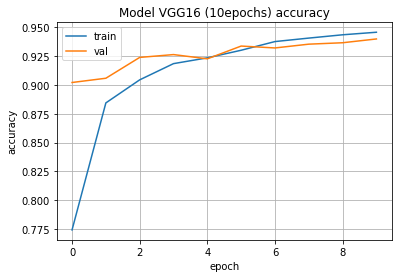

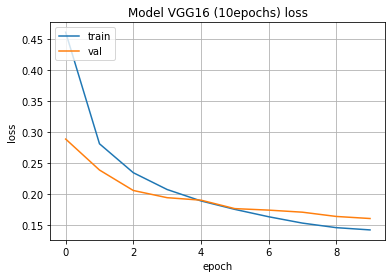

In [ ]:
print("Accuracy VGG_16 on test data: {0:.2f}%".format(score_vgg16[1]*100))
get_plots(history_vgg16, "Model VGG16 (10epochs)")

Accuracy VGG_19 on test data: 92.02%


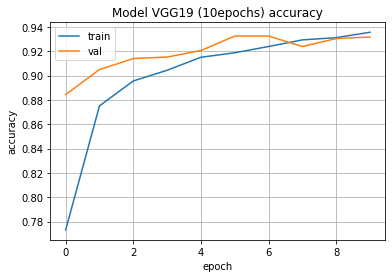

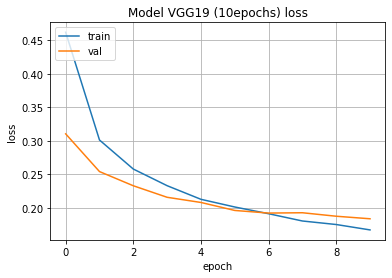

In [ ]:
print("Accuracy VGG_19 on test data: %.2f%%" % (scores_vgg19[1]*100))
get_plots(history_vgg19, "Model VGG19 (10epochs)")

##Check perfomance 

In [ ]:
import os
import urllib.request
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

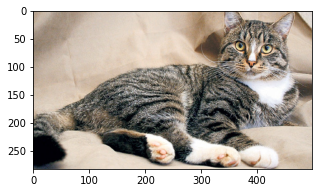

Model answer: 'This is cat'


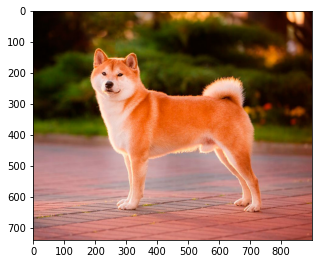

Model answer: 'This is dog'


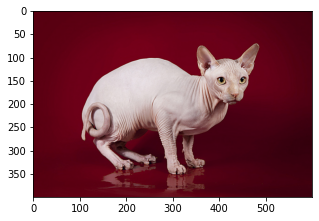

Model answer: 'This is dog'


In [ ]:
def predict_by_url(model, url):
  urllib.request.urlretrieve(url, 'image.jpg')
  os.listdir()
  image = np.asarray(cv2.imread('image.jpg'))
  image_resize = np.asarray(cv2.resize(image, (250, 250))).reshape(1, 250, 250, 3)
  prediction = model.predict(image_resize)
  if prediction == 0:
    answer = "Model answer: 'This is cat'"
  else:
    answer = "Model answer: 'This is dog'"
  img = mpimg.imread('image.jpg')
  plt.figure(figsize = (5,7))
  plt.imshow(img)
  plt.show()
  return answer

print(predict_by_url(model_vgg16, 'https://www.eg.ru/upimg/photo/148602.jpg'))
print(predict_by_url(model_vgg16, 'https://faunistics.com/wp-content/uploads/2019/11/1-10.jpg'))
print(predict_by_url(model_vgg16, 'https://opt-1031816.ssl.1c-bitrix-cdn.ru/upload/resize_cache/iblock/bd5/750_400_1/donskoy_sfinks.jpg?152823742568663'))